In [1]:
# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [3]:
# 📂 Step 2: Load the dataset
file_path = r"C:\Users\avina\Downloads\archive (9)\car_purchasing.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Display basic info
df.head()


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
# 🧼 Step 3: Clean the dataset

# Drop irrelevant columns
df.drop(['customer name', 'customer e-mail', 'country'], axis=1, inplace=True)

# Encode 'gender'
df['gender'] = df['gender'].map({1: 1, 0: 0})  # Assuming gender is already numeric

# Check for missing values
df.isnull().sum()


gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

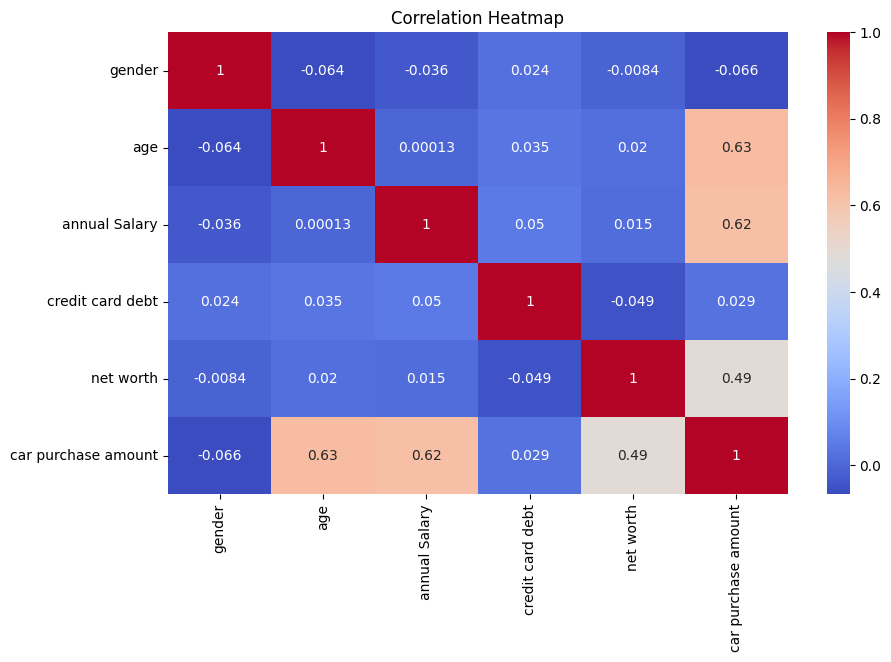

In [6]:
# 📊 Step 4: Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# 📐 Step 5: Feature Scaling
X = df.drop("car purchase amount", axis=1)
y = df["car purchase amount"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# 🔍 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
# 🤖 Step 7: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
# 📈 Step 8: Evaluate the model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 2326.702679733135
R² Score: 0.9498621195840186


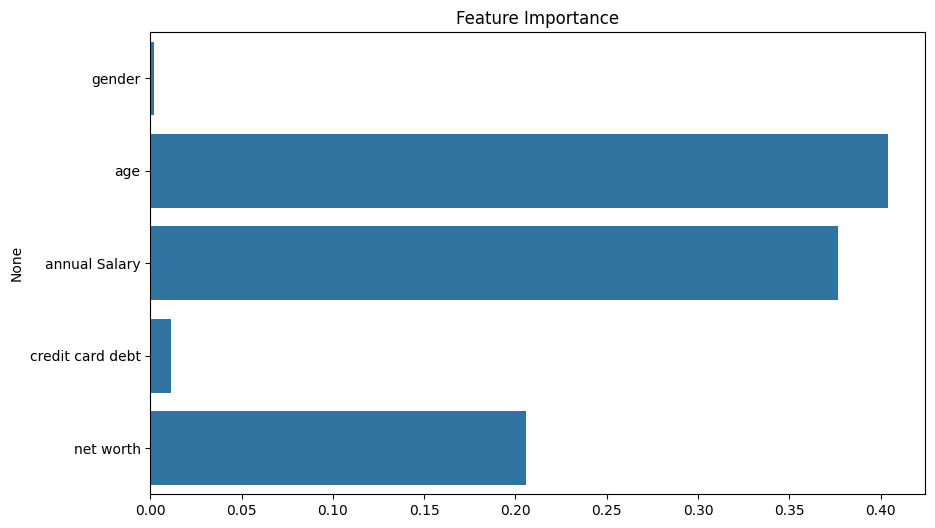

In [12]:
# 🔍 Step 9: Feature importance
importances = model.feature_importances_
columns = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=columns)
plt.title("Feature Importance")
plt.show()


In [13]:
# 💾 Step 10: Save model for future use
import joblib
joblib.dump(model, "car_sales_prediction_model.pkl")


['car_sales_prediction_model.pkl']